# Exercise 2: Bathymetry

Aim: To work with bathymetry data and plot a contour figure

- Author: XX YOUR NAME XX
- Purpose: Plot profile data
- Date: YYYY-MM-DD

Four figures should be generated:
- ex2fig1-Lastname-Messfern.png: Map of bathymetry
- ex2fig2-Lastname-Messfern.png: Second map of bathymetry

Packages: You will need to install the package `netCDF4` and `cartopy`, and - if you choose to do the "extra challenge" - `cmocean`.
<hr>

In [9]:
# Importing required packages here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import netCDF4

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.ticker import ScalarFormatter
from modules.bathymetry import *



# URL for the bathymetry data

1. Navigate to [ETOPO bathymetry](https://www.ncei.noaa.gov/products/etopo-global-relief-model)

2. Launch grid extract.  Choose ETOPO_2022 (Bedrock; 60 arcseconds)

3. Choose an area of interest, e.g. 66N, 63N, 35W (-35) and 25W (-25).

4. Download data

In [7]:
rootdir = '/Users/eddifying/Cloudfree/gitlab-cloudfree/messfern-plot/bathy/'
bathymetry_data_path = rootdir + 'data/ETOPO_2022_v1_60s_N90W180_bed.nc'
bathymetry_data = get_bathymetry_data()

# Choose your area of interest
min_lon = -35
max_lon = -25
min_lat = 63
max_lat = 66

bathymetry_subset = get_bathymetry_subset_data(
    bathymetry_data,
    min_lon, max_lon,
    min_lat, max_lat
)

bathymetry_data = BathymetryDataSingleton()
bathymetry_data.set(bathymetry_subset)
print(bathymetry_subset)




# Output file paths for figures
figdir = '../figures/'
if not os.path.exists(figdir):
    os.makedirs(figdir)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(600), lat(180)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 z(lat, lon)
    groups: 


## Make a simple plot

### Using Matplotlib

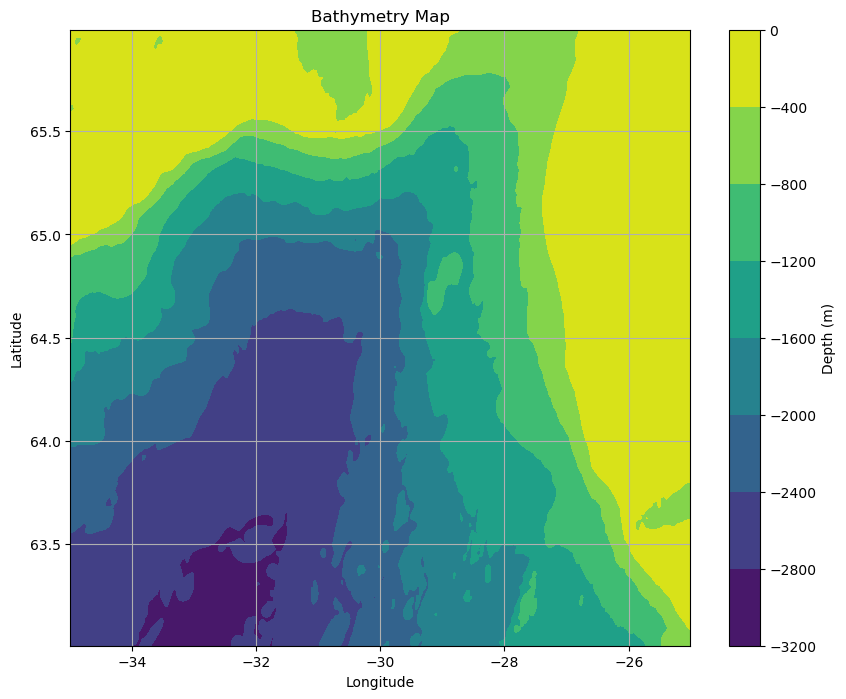

In [8]:
# Extract the latitude, longitude, and bathymetry data
lats = bathymetry_subset.variables['lat'][:]
lons = bathymetry_subset.variables['lon'][:]
bathymetry = bathymetry_subset.variables['z'][:]

# Create a contour plot
plt.figure(figsize=(10, 8))
plt.contourf(lons, lats, bathymetry, cmap='viridis')
plt.colorbar(label='Depth (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry Map')
plt.grid(True)

# Save the figure
plt.savefig(figdir + 'ex2fig1-LastName-Messfern.png')
plt.show()

### Plot a map using cartopy

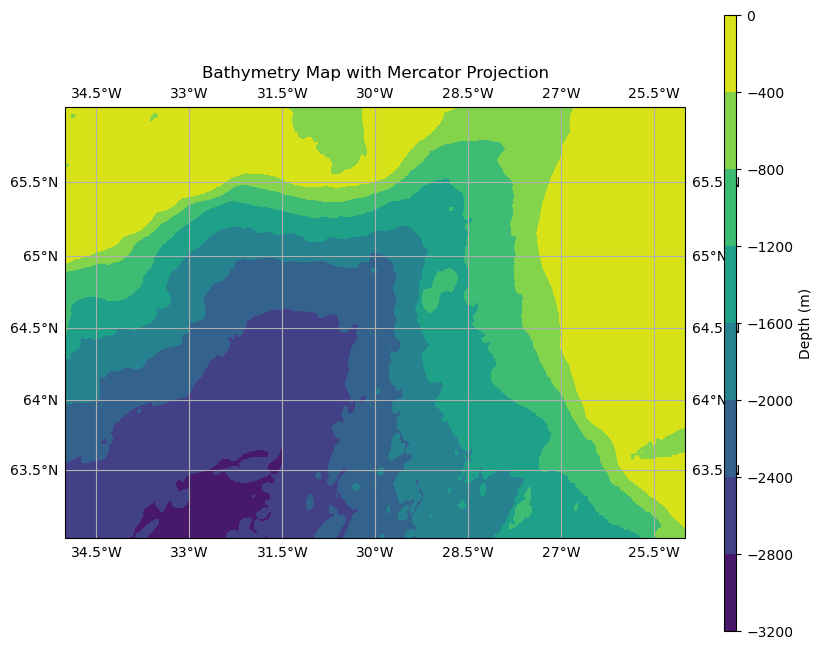

In [10]:
# Create a figure and axis with a Mercator projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.Mercator()})

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Set the extent to the area of interest
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Plot the bathymetry data
contour = ax.contourf(lons, lats, bathymetry, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=50)
cbar.set_label('Depth (m)')

# Add title
plt.title('Bathymetry Map with Mercator Projection')

# Save the figure
plt.savefig(figdir + 'ex2fig2-LastName-Messfern.png')
plt.show()

## Now edit the maps - work with the cartopy version

- Add a single point location using a circle for the DS2 mooring (66.0128 latitude, -27.270200 longitude)
- Add a legend that specifies "DS2 mooring" for the circle
- Turn off latitude markers on the right hand side of the plot
- Install the `cmocean` package, and change the color scale to something appropriate for bathymetry


- **Extra challenge:** Mark the deepest point on the map with a square

Check that your figure output to the `figures/` directory has these new updates.
